**Описание датасета**
Данные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

In [1]:
# import of required libraries
import pandas as pd
import math
#import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from itertools import combinations
#from scipy.stats import ttest_ind

In [2]:
# Функция заполнения пропущенных значений
# Функция принимает на вход датафрейм df и необязательный перечень колонок в которых будут производится замены.
# Если список колонок не передавать, замена будет производиться по всем колонкам датафрейма.
# и необязательный параметр func - функция с помощью которой будет производится замена:
# По умолчанию auto - для числовых применяется median(), для не числовых - mode()
# median - независимо от типа данных применяется median()
# mode - независимо от типа данных применяется mode()
# Функция возвращает датафрейм с заполнеными пропусками.
# Пример вызова: df = fill_nan(df, 'column1', 'column2') или df = fill_nan(df)

def fill_nan(df, *args, func='auto'):
    if len(args) == 0:
        column = df.columns
    else:
        colum = args
    for col in colum:
        if (np.dtype(df[col]) == float) or (np.dtype(df[col]) == int):
            if (func == 'auto') | (func == 'median'):
                df[col] = df[col].apply(lambda x: df[col].median() if np.isnan(x) else x)
            else:
                df[col] = df[col].apply(lambda x: df[col].mode()[0] if np.isnan(x) else x)
        elif np.dtype(df[col]) == object:
            if (func == 'auto') | (func == 'mode'):
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(df[col].median())
    return df

In [3]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 40) # показывать больше колонок

In [4]:
students = pd.read_csv(r'stud_math.xls')
display(students)
display(students.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

<AxesSubplot:>

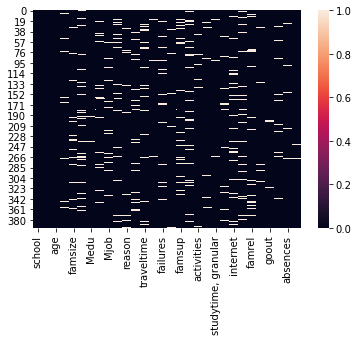

In [5]:
sns.heatmap(students.isnull())

Датасетсет содержит 395 строк данных  
30 колонок показателей, 
из них 13 - числовых и 17 - строковых, но по сути только ___age, failures, absences___ - являются количественными,  
остальные -  признаки.  
Кроме ___school, sex, age___ все столбцы имеют пропуски данных  
Столбец ___score___ является целевым

Теперь рассмотрим все столбцы по отдельности  

Начнем с числовых показателей

# age

Этот столбец числовой и без пропусков. Посмотрим на его распределение:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

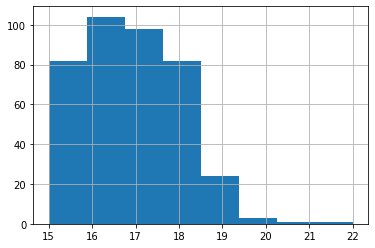

In [6]:
students.age.hist(bins=len(students.age.unique()))
students.age.describe()

из распределения видно, что оно смещено вправо и молодых в возрасте 20 - 22 года очень мало, но так как задача стоит отследить влияние условий жизни учащихся в возрасте от 15 до 22, то эти значения не являются выбросом

# failures

Столбец содержит пропуски, заменим их медианой

In [7]:
#display(students.failures.unique())

In [8]:
students = fill_nan(students, 'failures')
#students.failures = students.failures.apply(lambda x: students.failures.median() if np.isnan(x) else x)
display(students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            386 non-null    obj

None

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

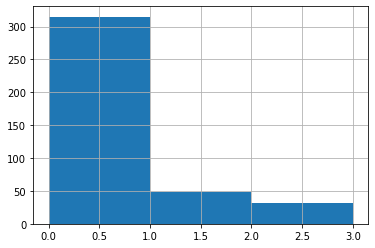

In [9]:
students.failures.hist(bins=3)
students.failures.describe()

Несмотря на то, что явно видны выбросы, удалять их не будем так как это полезные данные

# absences

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

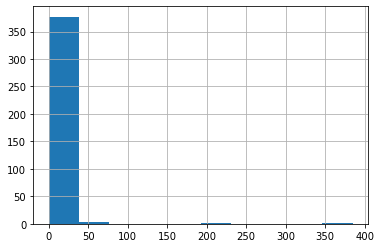

In [10]:
students.absences.hist()
students.absences.describe()

Этот столбец содержит 12 пропущенных значений, в данной категории пустые значения заменим медианой.  
Из распределения видны несколько значений >150, что явно противоречит логике - количество пропущенных занятий превышает количество самих занятий (150 - разумно предположимое количество занятий - 40 недель по 3-4 занятия в неделю (маткласс)), поэтому их удалим

In [11]:
students = fill_nan(students, 'absences')
students = students.loc[students.absences <= 150]
display(students.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               393 non-null    object 
 1   sex                  393 non-null    object 
 2   age                  393 non-null    int64  
 3   address              376 non-null    object 
 4   famsize              366 non-null    object 
 5   Pstatus              348 non-null    object 
 6   Medu                 390 non-null    float64
 7   Fedu                 369 non-null    float64
 8   Mjob                 374 non-null    object 
 9   Fjob                 357 non-null    object 
 10  reason               376 non-null    object 
 11  guardian             363 non-null    object 
 12  traveltime           365 non-null    float64
 13  studytime            386 non-null    float64
 14  failures             393 non-null    float64
 15  schoolsup            384 non-null    obj

None

count    393.000000
mean       5.697201
std        7.969484
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

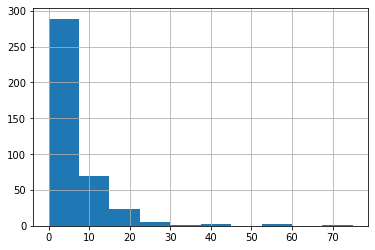

In [12]:
students.absences.hist()
students.absences.describe()

В данных есть выбросы, но удалять их не будем, так как такое вполне вероятно (длительная болезнь) и такие данные потенциально полезные

# score
Столбец содержит пропуски, но так как это целевые данные заменять их не будем, просто удалим не информативные строки, их немного - 6

In [13]:
students = students.loc[~ np.isnan(students.score)]
display(students.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               387 non-null    object 
 1   sex                  387 non-null    object 
 2   age                  387 non-null    int64  
 3   address              372 non-null    object 
 4   famsize              360 non-null    object 
 5   Pstatus              342 non-null    object 
 6   Medu                 384 non-null    float64
 7   Fedu                 363 non-null    float64
 8   Mjob                 368 non-null    object 
 9   Fjob                 351 non-null    object 
 10  reason               370 non-null    object 
 11  guardian             357 non-null    object 
 12  traveltime           359 non-null    float64
 13  studytime            380 non-null    float64
 14  failures             387 non-null    float64
 15  schoolsup            378 non-null    obj

None

count    387.000000
mean      52.196382
std       22.914748
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

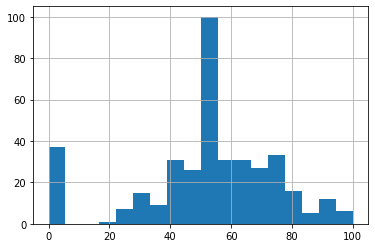

In [14]:
students.score.hist(bins=len(students.score.unique()))
students.score.describe()

Как видно данные выбросов не содержат и расположены в интервале от 0 до 100, что логично.

# Medu

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

<AxesSubplot:>

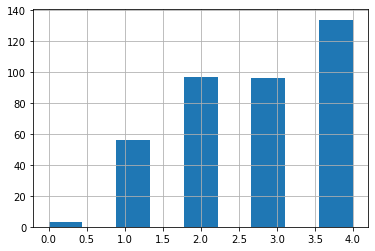

In [31]:
students = fill_nan(students, 'Medu', func='mode')
#display(students.info())
students.Medu.hist(bins=int(1+3.322*math.log10(len(students.Medu))))

Распределение без выбросов и соответствует ожидаемому

# Fedu

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               387 non-null    object 
 1   sex                  387 non-null    object 
 2   age                  387 non-null    int64  
 3   address              372 non-null    object 
 4   famsize              360 non-null    object 
 5   Pstatus              342 non-null    object 
 6   Medu                 387 non-null    float64
 7   Fedu                 387 non-null    float64
 8   Mjob                 368 non-null    object 
 9   Fjob                 351 non-null    object 
 10  reason               370 non-null    object 
 11  guardian             357 non-null    object 
 12  traveltime           359 non-null    float64
 13  studytime            380 non-null    float64
 14  failures             387 non-null    float64
 15  schoolsup            378 non-null    obj

None

2.0     128
3.0      93
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64

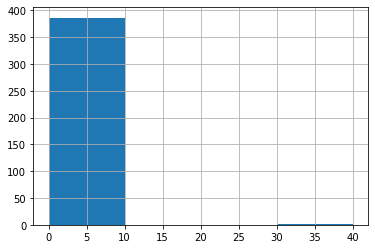

In [20]:
students = fill_nan(students, 'Fedu', func='mode')
#display(students.info())
students.Fedu.hist(bins=4)
display(students.Fedu.value_counts())

Имеется ошибочное значение, оно одно поэтому его удалим

2.0    128
3.0     93
4.0     88
1.0     75
0.0      2
Name: Fedu, dtype: int64

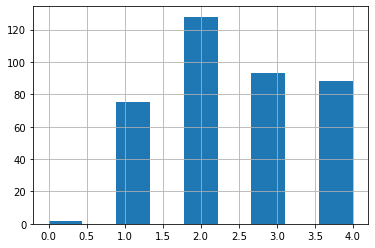

In [30]:
students = students.loc[students.Fedu <= 4]
#display(students.info())
students.Fedu.hist(bins=int(1+3.322*math.log10(len(students.Fedu))))
#display(students.Fedu.value_counts())

Распределение без выбросов и соответствует ожидаемому

In [16]:
#cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
#                      else x if '(' not in x else x[:x.find('(')].strip())